[0.0, 0.010101697132389554, 0.020207515444316627, 0.030321571078225612, 0.04044797013309076, 0.050590803719035675, 0.06075414310236913, 0.07094203496919405, 0.08115849683411108, 0.09140751261857315, 0.10169302842119539, 0.1120189484998448, 0.12238913148267394, 0.13280738682248736, 0.14327747150599143, 0.15380308702663253, 0.16438787662693002, 0.17503542281350215, 0.1857492451454081, 0.19653279829402212, 0.2073894703704422, 0.2183225815144412, 0.22933538273720144, 0.24043105500854367, 0.25161270857807705, 0.26288338251864074, 0.2742460444795886, 0.2857035906368571, 0.2972588458263599, 0.30891456384702964, 0.3206734279197814, 0.33253805128876956, 0.3445109779515445, 0.3565946835050481, 0.3687915760948287, 0.38110399745535944, 0.39353422402991195, 0.40608446815905264, 0.4187568793274639, 0.43155354545946323, 0.4444764942542526, 0.45752769455260484, 0.4707090577273513, 0.4840224390906807, 0.4974696393118808, 0.5110524058397582, 0.5247724343245429, 0.5386313700346267, 0.5526308092639988, 0.

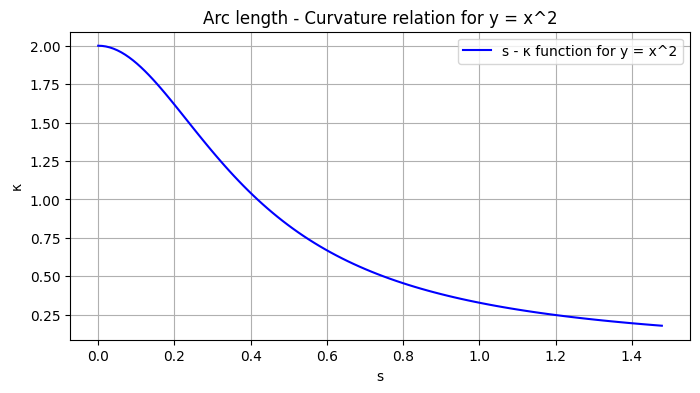

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 定义函数 y = f(x)
def f(x):
    return x**2

# 定义导数 dy/dx
def df_dx(x):
    return 2 * x

# 定义曲率函数
def curvature(x):
    return np.abs(2) / (1 + (2 * x)**2)**(3/2)

# 定义弧长积分被积函数
def integrand(x):
    return np.sqrt(1 + (2 * x)**2)

# 计算弧长函数
def arc_length(x):
    s, _ = quad(integrand, 0, x)  # 在区间 [0, x] 上计算弧长
    return s

# 计算曲率函数
x_values = np.linspace(0, 1, 100)
kappa_values = curvature(x_values)

# 计算弧长函数
s_values = [arc_length(x) for x in x_values]
print(s_values, kappa_values)
# 绘制弧长-曲率关系图像
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='s - κ function for y = x^2', color='blue')
plt.xlabel('s')
plt.ylabel('κ')
plt.title('Arc length - Curvature relation for y = x^2')
plt.legend()
plt.grid(True)
plt.show()



[0.0, 0.20521212608536896, 0.43929203350866664, 0.7226082640993224, 1.0669643225407475, 1.4789428575445973] [2.0, 1.6008218808366539, 0.9522790359061344, 0.5247413112003932, 0.2977522134849325, 0.17888543819998318]


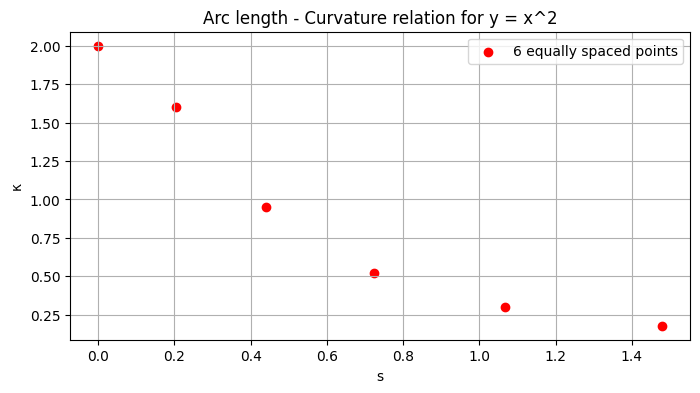

In [10]:
# 从上式中等距抽取 6 个点
test_s = [arc_length(x) for x in np.linspace(0, 1, 6)]
test_kappa = [curvature(x) for x in np.linspace(0, 1, 6)]
print(test_s, test_kappa)
# 绘图
plt.figure(figsize=(8, 4))
plt.scatter(test_s, test_kappa, color='red', label='6 equally spaced points')
plt.xlabel('s')
plt.ylabel('κ')
plt.title('Arc length - Curvature relation for y = x^2')
plt.legend()
plt.grid(True)
plt.show()


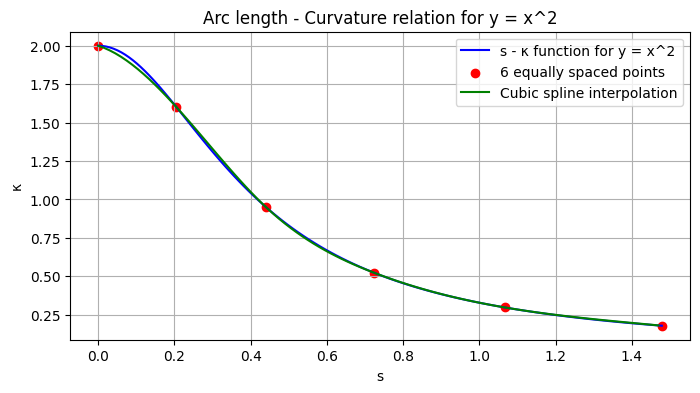

In [11]:
# 采用样条插值法对曲率函数进行插值
from scipy.interpolate import CubicSpline
cs = CubicSpline(test_s, test_kappa)
new_s = np.linspace(0, 1.47, 100)
new_kappa = cs(new_s)
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='s - κ function for y = x^2', color='blue')
plt.scatter(test_s, test_kappa, color='red', label='6 equally spaced points')
plt.plot(new_s, new_kappa, label='Cubic spline interpolation', color='green')
plt.xlabel('s')
plt.ylabel('κ')
plt.title('Arc length - Curvature relation for y = x^2')
plt.legend()
plt.grid(True)
plt.show()


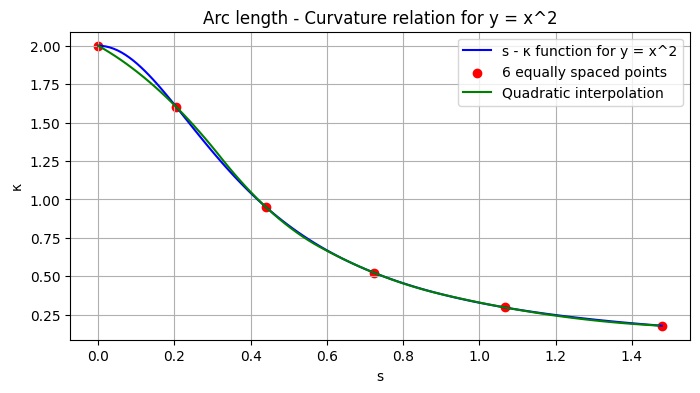

In [12]:
# 多项式插值
from scipy.interpolate import interp1d
f = interp1d(test_s, test_kappa, kind='quadratic')
new_kappa = f(new_s)
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, kappa_values, label='s - κ function for y = x^2', color='blue')
plt.scatter(test_s, test_kappa, color='red', label='6 equally spaced points')
plt.plot(new_s, new_kappa, label='Quadratic interpolation', color='green')
plt.xlabel('s')
plt.ylabel('κ')
plt.title('Arc length - Curvature relation for y = x^2')
plt.legend()
plt.grid(True)
plt.show()


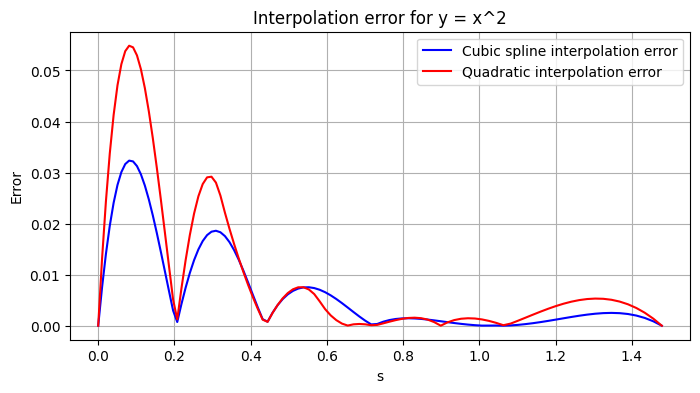

In [13]:
# 计算误差
err1 = np.abs(kappa_values - cs(s_values))
err2 = np.abs(kappa_values - f(s_values))
# 绘图
plt.figure(figsize=(8, 4))
plt.plot(s_values, err1, label='Cubic spline interpolation error', color='blue')
plt.plot(s_values, err2, label='Quadratic interpolation error', color='red')
plt.xlabel('s')
plt.ylabel('Error')
plt.title('Interpolation error for y = x^2')
plt.legend()
plt.grid(True)
plt.show()